In [1]:
import pandas as pd

Будем работать с датасетом по оттоку клиентов из банка https://www.kaggle.com/datasets/shubh0799/churn-modelling, но датасет из себя будет представлять две таблицы:

1. Личные данные клиента

* CustomerId - Уникальный идентификатор клиента
* Surname - Фамилия клиента
* Geography - Из какой страны клиент
* Gender - Пол клиента
* Age - Возраст клиента
* EstimatedSalary - Предположительная зарплата клиента

2. Данные по поведению клиента в банке

* CustomerId - Уникальный идентификатор клиента
* CustomerId - Уникальный идентификатор клиента
* Tenure - Сколько лет человек является клиентом банка
* Balance - Баланс счета
* NumOfProducts - Количество открытых продуктов
* HasCrCard - Есть ли у клиента кредитная карта
* IsActiveMember - Является ли клиент активные участником
* Exited - Уйдет ли человек в отток

In [2]:
users = pd.read_csv('./Churn_Modelling.csv')
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
users.shape

(10000, 14)

## Создание новых признаков

In [4]:
users['new_feature'] = 0
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,new_feature
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


In [5]:
users['Age (days)'] = users['Age'] * 365
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,new_feature,Age (days)
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,15330
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,14965
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,15330
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,14235
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,15695


метод iterrows, долго, лучше пользоваться другим подходом

In [6]:
for i, row in users.iloc[:2].iterrows():
    print(row)
    print('__' * 30)

RowNumber                  1
CustomerId          15634602
Surname             Hargrave
CreditScore              619
Geography             France
Gender                Female
Age                       42
Tenure                     2
Balance                  0.0
NumOfProducts              1
HasCrCard                  1
IsActiveMember             1
EstimatedSalary    101348.88
Exited                     1
new_feature                0
Age (days)             15330
Name: 0, dtype: object
____________________________________________________________
RowNumber                  2
CustomerId          15647311
Surname                 Hill
CreditScore              608
Geography              Spain
Gender                Female
Age                       41
Tenure                     1
Balance             83807.86
NumOfProducts              1
HasCrCard                  0
IsActiveMember             1
EstimatedSalary    112542.58
Exited                     0
new_feature                0
Age (days)       

In [7]:
age_days = []

for i, row in users.iterrows():
    age_days.append(row['Age'] * 365)

age_days[:10]

[15330, 14965, 15330, 14235, 15695, 16060, 18250, 10585, 16060, 9855]

Получили массив

In [8]:
users['Age (days) 2'] = age_days
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,new_feature,Age (days),Age (days) 2
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,15330,15330
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,14965,14965
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,15330,15330
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,14235,14235
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,15695,15695


Лучше пользоваться методом apply, встроенным в pandas.

In [9]:
def age_to_days(x):
    return x * 365

users['Age (days) 3'] = users['Age'].apply(age_to_days)
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,new_feature,Age (days),Age (days) 2,Age (days) 3
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,15330,15330,15330
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,14965,14965,14965
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,15330,15330,15330
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,14235,14235,14235
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,15695,15695,15695


Вывод сколько строчек мы уже прошли, приблизительное время ожидания.

In [10]:
import time
from tqdm import tqdm
tqdm.pandas()


def age_to_days(x):
    time.sleep(0.001)
    return x * 365

users['Age'].progress_apply(age_to_days)

100%|██████████| 10000/10000 [02:20<00:00, 71.17it/s]


0       15330
1       14965
2       15330
3       14235
4       15695
        ...  
9995    14235
9996    12775
9997    13140
9998    15330
9999    10220
Name: Age, Length: 10000, dtype: int64

## Удаление признаков

Метод drop

Нет столбца new_feature

In [11]:
users.drop(columns='new_feature')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age (days),Age (days) 2,Age (days) 3
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,15330,15330,15330
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,14965,14965,14965
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,15330,15330,15330
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,14235,14235,14235
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,15695,15695,15695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,14235,14235,14235
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,12775,12775,12775
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,13140,13140,13140
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,15330,15330,15330


Есть столбец new_feature

In [12]:
users.drop(columns='new_feature')
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,new_feature,Age (days),Age (days) 2,Age (days) 3
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,15330,15330,15330
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,14965,14965,14965
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,15330,15330,15330
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,14235,14235,14235
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,15695,15695,15695


Чтобы точно удалить столбец new_feature

In [13]:
users = users.drop(columns='new_feature')
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age (days),Age (days) 2,Age (days) 3
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,15330,15330,15330
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,14965,14965,14965
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,15330,15330,15330
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,14235,14235,14235
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,15695,15695,15695


In [14]:
users['new_feature'] = 0

inplace - перезапись пройдет на месте

In [15]:
users.drop(columns='new_feature', inplace=True)
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age (days),Age (days) 2,Age (days) 3
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,15330,15330,15330
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,14965,14965,14965
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,15330,15330,15330
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,14235,14235,14235
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,15695,15695,15695


In [16]:
users.drop(columns=['Age (days)', 'Age (days) 2', 'Age (days) 3'], inplace=True)
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Изменение существующих признаков

### .loc

Создадим новый признак target

In [17]:
users['target'] = 0
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,target
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


Берем клиентов, которые живут только во France

In [18]:
users.loc[users['Geography'] == 'France']

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,target
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0


In [19]:
users.loc[users['Geography'] == 'France', 'target']

0       0
2       0
3       0
6       0
8       0
       ..
9994    0
9995    0
9996    0
9997    0
9999    0
Name: target, Length: 5014, dtype: int64

Ошибка если не через .loc

In [20]:
users[users['Geography'] == 'France']['target'] = 1
users.head()

C:\Users\ekolo\AppData\Local\Temp\ipykernel_3216\1082220520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users[users['Geography'] == 'France']['target'] = 1


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,target
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


In [21]:
users.loc[users['Geography'] == 'France', 'target'] = 1
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,target
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


### .replace

In [22]:
users['Gender'].replace({'Female': 'F', 'Male': 'M'})

0       F
1       F
2       F
3       F
4       F
       ..
9995    M
9996    M
9997    F
9998    M
9999    F
Name: Gender, Length: 10000, dtype: object

In [23]:
users['Gender'].replace({'Female': 'F', 'Male': 'M'}, inplace=True)
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,target
0,1,15634602,Hargrave,619,France,F,42,2,0.00,1,1,1,101348.88,1,1
1,2,15647311,Hill,608,Spain,F,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,F,42,8,159660.80,3,1,0,113931.57,1,1
3,4,15701354,Boni,699,France,F,39,1,0.00,2,0,0,93826.63,0,1
4,5,15737888,Mitchell,850,Spain,F,43,2,125510.82,1,1,1,79084.10,0,0


## Методы агрегации

In [24]:
users['Age'].agg(['min', 'max'])

min    18
max    92
Name: Age, dtype: int64

In [25]:
users.agg({
    'Age': ['min', 'max'],
    'EstimatedSalary': 'mean'
})

,Age,EstimatedSalary
min,18.0,NaN
max,92.0,NaN
mean,NaN,100090.239881


In [26]:
users.agg(
    min_age=('Age', 'min'),
    max_age=('Age', 'max'),
    mean_salary=('EstimatedSalary', 'mean')
)

,Age,EstimatedSalary
min_age,18.0,NaN
max_age,92.0,NaN
mean_salary,NaN,100090.239881


### Методы объединения

In [27]:
bank = pd.read_csv('./Churn_Modelling.csv')
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [28]:
bank.shape

(10000, 14)

### merge

In [29]:
merged = users.merge(bank, left_on='CustomerId', right_on='CustomerId')
merged.head()

,RowNumber_x,CustomerId,Surname_x,CreditScore_x,Geography_x,Gender_x,Age_x,Tenure_x,Balance_x,NumOfProducts_x,...,Geography_y,Gender_y,Age_y,Tenure_y,Balance_y,NumOfProducts_y,HasCrCard_y,IsActiveMember_y,EstimatedSalary_y,Exited_y
0,1,15634602,Hargrave,619,France,F,42,2,0.00,1,...,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,F,41,1,83807.86,1,...,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,F,42,8,159660.80,3,...,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,F,39,1,0.00,2,...,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,F,43,2,125510.82,1,...,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### join

In [30]:
users_id = users.set_index('CustomerId')
users_id.head()

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,target
CustomerId,,,,,,,,,,,,,,
15634602,1,Hargrave,619,France,F,42,2,0.00,1,1,1,101348.88,1,1
15647311,2,Hill,608,Spain,F,41,1,83807.86,1,0,1,112542.58,0,0
15619304,3,Onio,502,France,F,42,8,159660.80,3,1,0,113931.57,1,1
15701354,4,Boni,699,France,F,39,1,0.00,2,0,0,93826.63,0,1
15737888,5,Mitchell,850,Spain,F,43,2,125510.82,1,1,1,79084.10,0,0


In [31]:
bank_id = bank.set_index('CustomerId')
bank_id.head()

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,,
15634602,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
bank_id.join(users_id).head()

In [ ]:
bank_id.join(users_id).reset_index().head()

In [34]:
bank.shape

(10000, 14)

### Атрибут how

In [35]:
toy_df1 = pd.DataFrame({
    'col_1': [1, 2, 3],
    'col_2': [9, 9, 9]
})

toy_df2 = pd.DataFrame({
    'col_1': [3, 4],
    'col_3': [0, 0]
})

display(toy_df1, toy_df2)

,col_1,col_2
0,1,9
1,2,9
2,3,9


,col_1,col_3
0,3,0
1,4,0


In [36]:
toy_df1.merge(toy_df2, how='left')

,col_1,col_2,col_3
0,1,9,NaN
1,2,9,NaN
2,3,9,0.0


In [37]:
toy_df1.merge(toy_df2, how='right')

,col_1,col_2,col_3
0,3,9.0,0
1,4,NaN,0


In [38]:
toy_df1.merge(toy_df2, how='inner')

,col_1,col_2,col_3
0,3,9,0


In [39]:
toy_df1.merge(toy_df2, how='outer')

,col_1,col_2,col_3
0,1,9.0,NaN
1,2,9.0,NaN
2,3,9.0,0.0
3,4,NaN,0.0


### left

In [40]:
merged_left = bank.merge(users, on='CustomerId', how='left')
merged_left.shape

(10000, 28)

Посчитаем пропуски

In [41]:
merged_left.isna().sum()

RowNumber_x          0
CustomerId           0
Surname_x            0
CreditScore_x        0
Geography_x          0
Gender_x             0
Age_x                0
Tenure_x             0
Balance_x            0
NumOfProducts_x      0
HasCrCard_x          0
IsActiveMember_x     0
EstimatedSalary_x    0
Exited_x             0
RowNumber_y          0
Surname_y            0
CreditScore_y        0
Geography_y          0
Gender_y             0
Age_y                0
Tenure_y             0
Balance_y            0
NumOfProducts_y      0
HasCrCard_y          0
IsActiveMember_y     0
EstimatedSalary_y    0
Exited_y             0
target               0
dtype: int64

In [ ]:
merged_left[merged_left['Age'].isna()]

In [43]:
users[users['CustomerId'] == 15682355]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,target
9998,9999,15682355,Sabbatini,772,Germany,M,42,3,75075.31,2,1,0,92888.52,1,0


### right

In [44]:
merged_right = bank.merge(users, on='CustomerId', how='right')
merged_right.shape

(10000, 28)

In [45]:
merged_right.isna().sum()

RowNumber_x          0
CustomerId           0
Surname_x            0
CreditScore_x        0
Geography_x          0
Gender_x             0
Age_x                0
Tenure_x             0
Balance_x            0
NumOfProducts_x      0
HasCrCard_x          0
IsActiveMember_x     0
EstimatedSalary_x    0
Exited_x             0
RowNumber_y          0
Surname_y            0
CreditScore_y        0
Geography_y          0
Gender_y             0
Age_y                0
Tenure_y             0
Balance_y            0
NumOfProducts_y      0
HasCrCard_y          0
IsActiveMember_y     0
EstimatedSalary_y    0
Exited_y             0
target               0
dtype: int64

In [ ]:
merged_right[merged_right['CreditScore'].isna()]

In [47]:
bank[bank['CustomerId'] == 15611325]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
169,170,15611325,Wood,682,Germany,Male,24,9,57929.81,2,0,0,53134.3,0


### inner

In [48]:
merged_inner = bank.merge(users, on='CustomerId', how='inner')
merged_inner.shape

(10000, 28)

In [49]:
merged_inner.isna().sum()

RowNumber_x          0
CustomerId           0
Surname_x            0
CreditScore_x        0
Geography_x          0
Gender_x             0
Age_x                0
Tenure_x             0
Balance_x            0
NumOfProducts_x      0
HasCrCard_x          0
IsActiveMember_x     0
EstimatedSalary_x    0
Exited_x             0
RowNumber_y          0
Surname_y            0
CreditScore_y        0
Geography_y          0
Gender_y             0
Age_y                0
Tenure_y             0
Balance_y            0
NumOfProducts_y      0
HasCrCard_y          0
IsActiveMember_y     0
EstimatedSalary_y    0
Exited_y             0
target               0
dtype: int64

### outer

In [50]:
merged_outer = bank.merge(users, on='CustomerId', how='outer')
merged_outer.shape

(10000, 28)

In [51]:
merged_outer.isna().sum()

RowNumber_x          0
CustomerId           0
Surname_x            0
CreditScore_x        0
Geography_x          0
Gender_x             0
Age_x                0
Tenure_x             0
Balance_x            0
NumOfProducts_x      0
HasCrCard_x          0
IsActiveMember_x     0
EstimatedSalary_x    0
Exited_x             0
RowNumber_y          0
Surname_y            0
CreditScore_y        0
Geography_y          0
Gender_y             0
Age_y                0
Tenure_y             0
Balance_y            0
NumOfProducts_y      0
HasCrCard_y          0
IsActiveMember_y     0
EstimatedSalary_y    0
Exited_y             0
target               0
dtype: int64

### Методы группировок

### groupby

In [52]:
toy_df = pd.DataFrame({
    'client_id': [1, 2, 2, 3, 1, 1],
    'item': ['chocolate', 'cheese', 'ham', 'candy', 'chair', 'book'],
    'price': [68, 280, 302, 39, 2099, 1089]
})

toy_df

,client_id,item,price
0,1,chocolate,68
1,2,cheese,280
2,2,ham,302
3,3,candy,39
4,1,chair,2099
5,1,book,1089


Образовались только группы

In [53]:
grouped = toy_df.groupby('client_id')
grouped

Образовалось три группы

In [54]:
grouped.groups

{1: [0, 4, 5], 2: [1, 2], 3: [3]}

In [55]:
grouped.sum()

C:\Users\ekolo\AppData\Local\Temp\ipykernel_3216\2368404282.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped.sum()


,price
client_id,
1,3256
2,582
3,39


In [56]:
grouped.agg({'price': ['sum', 'min', 'max']})

price           
            sum  min   max
client_id                 
1          3256   68  2099
2           582  280   302
3            39   39    39

In [57]:
users.groupby('Geography').agg({'Age': ['mean'], 'EstimatedSalary': ['min']})

,Age,EstimatedSalary
,mean,min
Geography,,
France,38.511767,90.07
Germany,39.771622,11.58
Spain,38.890997,417.41


### pivot_table

In [58]:
toy_df

,client_id,item,price
0,1,chocolate,68
1,2,cheese,280
2,2,ham,302
3,3,candy,39
4,1,chair,2099
5,1,book,1089


In [59]:
toy_df.pivot_table(index='client_id',
                   values='price',
                   aggfunc='sum')

,price
client_id,
1,3256
2,582
3,39


In [60]:
users.pivot_table(index='Geography',
                  aggfunc={'Age': ['mean'], 'EstimatedSalary': 'min'})

,Age,EstimatedSalary
,mean,min
Geography,,
France,38.511767,90.07
Germany,39.771622,11.58
Spain,38.890997,417.41


In [61]:
users.pivot_table(index='Geography',
                  columns='Gender', 
                  values='EstimatedSalary',
                  aggfunc='mean',
                  margins=True,
                  margins_name='Total')

Gender,F,M,Total
Geography,,,
France,99564.252755,100174.252495,99899.180814
Germany,102446.424124,99905.033959,101113.435102
Spain,100734.107475,98425.687680,99440.572281
Total,100601.541382,99664.576931,100090.239881


### crosstab (функция)

In [62]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'])

Gender,F,M
Geography,,
France,2261,2753
Germany,1193,1316
Spain,1089,1388


In [63]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'],
            values=users['EstimatedSalary'],
            aggfunc='mean')

Gender,F,M
Geography,,
France,99564.252755,100174.252495
Germany,102446.424124,99905.033959
Spain,100734.107475,98425.687680


In [64]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'],
            normalize='all')

Gender,F,M
Geography,,
France,0.2261,0.2753
Germany,0.1193,0.1316
Spain,0.1089,0.1388


In [65]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'],
            normalize='index')

Gender,F,M
Geography,,
France,0.450937,0.549063
Germany,0.475488,0.524512
Spain,0.439645,0.560355


In [66]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'],
            normalize='columns')

Gender,F,M
Geography,,
France,0.497689,0.504490
Germany,0.262602,0.241158
Spain,0.239709,0.254352


## Встроенные визуализации

In [67]:
import matplotlib

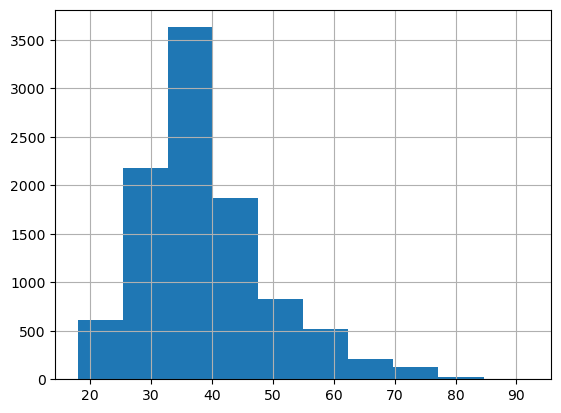

In [68]:
users['Age'].hist();

In [69]:
data = users.groupby('Gender').count()['Age']
data.name = 'Gender'
data

Gender
F    4543
M    5457
Name: Gender, dtype: int64

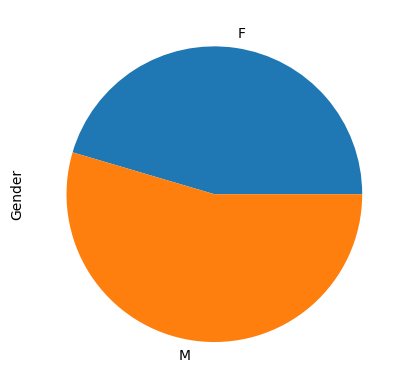

In [70]:
data.plot.pie(y='Gender');

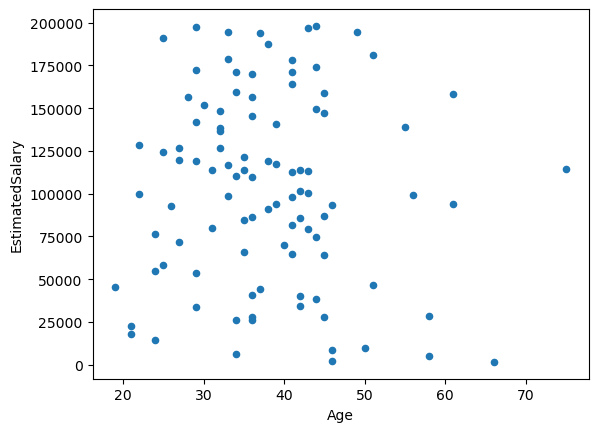

In [71]:
users.iloc[:100].plot.scatter(x='Age', y='EstimatedSalary');

In [72]:
data = bank.groupby('Tenure').count()['Balance']
data.name = 'num_clients'
data

Tenure
0      413
1     1035
2     1048
3     1009
4      989
5     1012
6      967
7     1028
8     1025
9      984
10     490
Name: num_clients, dtype: int64

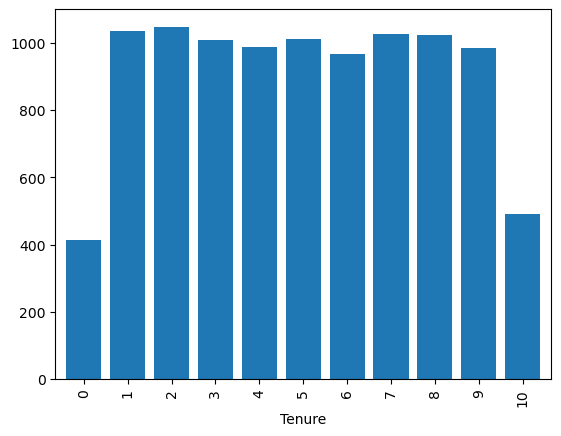

In [73]:
data.plot.bar(width=0.8);